# <font color='green'>Projeto Integrador 3 - Análise de Dados 1</font>
## <font color='green'>Projeto 4 - Trabalhando com Codificação de Caracteres</font>

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.5


In [3]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [5]:
# Importação dos módulos básicos
import numpy as np
import pandas as pd
# Módulo muito útil para Codificação de Caracteres
import chardet
# Definição de um princípio de geração para reprodutibilidade
np.random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "pyPRO - Transformando vidas com o Poder do Código!" --iversions

ModuleNotFoundError: No module named 'watermark'

## Entendendo a Codificação de Caracteres (character encoding)

Codificações de caracteres são conjuntos específicos de regras para mapeamento de bytes binários brutos de strings  (que se parecem com isto: 0110100001101001) para caracteres que compõem texto legível por humanos (como "oi").

Como existem muitas técnicas (ou padrões) diferentes usadas para codificar tais conjuntos de dados binários e se você tentar converter tais dados no texto sem conhecer a técnica de codificação em que foi originalmente escrito, você acabará com o texto embaralhado ou sem sentido. Esse texto embaralhado é chamado de "mojibake" (dito como mo-gee-bah-kay). Aqui está um exemplo de mojibake:

æ–‡å—åŒ–ã??.

Você também pode acabar com caracteres "desconhecidos". Isso ocorre quando não há mapeamento entre um byte específico e um caractere na codificação que você está usando para ler sua string de bytes e eles se parecem com isto:

����������

Incompatibilidades de codificação de caracteres são menos comuns hoje do que costumavam ser, mas definitivamente ainda são um problema. Existem muitas codificações de caracteres diferentes, mas a principal que você precisa conhecer é UTF-8.

**UTF-8 é a codificação de texto padrão. Todo o código Python está em UTF-8 e, idealmente, todos os seus dados também devem estar. É quando as coisas não estão em UTF-8 que você tem problemas.**

Foi muito difícil lidar com codificações no Python 2, mas felizmente no Python 3 é muito mais simples. Existem dois tipos de dados principais que você encontrará ao trabalhar com texto em Python 3:

Uma é a string, que é o texto por padrão. Os outros dados são do tipo de dados bytes, que é uma sequência de números inteiros. 

Vamos ver um exemplo de uma string:

In [11]:
# inicialize uma variável com uma string
frase = "Este é o símbolo do Euro: €"

# Verificando o tipo de dado da variável "frase"
type(frase)

str

Vamos ver agora o outro tipo de dado: byte

In [14]:
# Codificando a frase para uma codificação diferente, substituindo os caracteres que geram erros
frase2 = frase.encode("utf-8", errors = "replace")

# Verificando agora o tipo de dado
type(frase2)

bytes

Se analisarmos um objeto do tipo bytes, veremos que ele tem um b na frente dele e talvez algum texto depois. 

Isso ocorre porque os bytes são impressos como se fossem caracteres codificados em ASCII. 

**ASCII é uma codificação de caracteres mais antiga que realmente não funciona para escrever qualquer idioma além do inglês.**

Aqui você pode ver que nosso símbolo do euro e também os caracteres com acentuação ("é" e "í") foram substituídos por "mojibakes" que se parece com "\xc3\xa9", "\xc3\xad" e "\xe2\x82\xac" quando impressos como se fossem uma string ASCII.

In [17]:
# verificando como os caracteres bytes são representados
frase2

b'Este \xc3\xa9 o s\xc3\xadmbolo do Euro: \xe2\x82\xac'

Quando convertemos nossos bytes de volta em uma string com a codificação correta, podemos ver que nosso texto está correto.

In [20]:
# convertendo de volta para utf-8
print(frase2.decode("utf-8"))

Este é o símbolo do Euro: €


No entanto, quando tentamos usar uma codificação diferente para mapear nossos bytes em uma string, obtemos um erro. 

Isso ocorre porque a codificação que estamos tentando usar não sabe o que fazer com os bytes que estamos tentando passar. 

Você precisa informar ao Python a codificação em que a string de bytes realmente deveria estar.

Você pode pensar em diferentes codificações como diferentes formas de gravar música. Você pode gravar a mesma música em um CD, fita cassete ou 8 faixas. Embora a música possa soar mais ou menos igual, você precisa usar o equipamento certo para reproduzir a música de cada formato de gravação. O decodificador correto é como um toca-fitas ou um toca-CD. Se você tentar reproduzir uma fita cassete em um CD player, simplesmente não funcionará.

In [23]:
# tentando codificar nossa string de bytes para a codificação ascii
print(frase2.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 5: ordinal not in range(128)

Também podemos ter problemas se tentarmos usar a codificação errada para mapear uma string para bytes. 

Como já foi mencionado, as strings são UTF-8 por padrão no Python 3, portanto, se tentarmos tratá-las como se estivessem em outra codificação, criaremos problemas.

Por exemplo, se tentarmos converter uma string em bytes para ascii usando encode(), podemos pedir que os bytes sejam o que seriam se o texto estivesse em ASCII. Como nosso texto não está em ASCII, haverá alguns caracteres que ele não pode manipular. Podemos substituir automaticamente os caracteres que o ASCII não suporta. Se fizermos isso, no entanto, quaisquer caracteres que não estejam em ASCII serão substituídos apenas pelo caractere desconhecido. Então, quando convertermos os bytes de volta para uma string, o caractere será substituído pelo caractere desconhecido. A parte perigosa disso é que não há como saber qual caracter deveria ser. Isso significa que podemos ter tornado nossos dados inutilizáveis!

In [26]:
# declarando novamente a frase...
frase = "Este é o símbolo do Euro: €"

# Codificando a frase para uma codificação diferente, substituindo os caracteres que geram erros
frase2 = frase.encode("ascii", errors = "replace")

# Convertendo a frase de volta
print(frase2.decode("ascii"))

# Perdemos a cadeia de bytes subjacente original! 
# Ela foi substituída pela cadeia de bytes subjacente para o caractere desconhecido!

Este ? o s?mbolo do Euro: ?


Isso é ruim e como analista de dados você deve evitar fazê-lo! 

É muito melhor converter todo o nosso texto para UTF-8 o mais rápido possível e mantê-lo nessa codificação. O melhor momento para converter entrada não UTF-8 em UTF-8 é quando você lê os arquivos.

A maioria dos conjuntos de dados (datasets) provavelmente será codificada com UTF-8. 

Isso é o que o Python espera por padrão, portanto, na maioria das vezes, você não terá problemas. No entanto, às vezes você receberá um erro como este: 

*UnicodeDecodeError: o codec 'utf-8' não pode decodificar o byte 0x99 na posição 11: byte inicial inválido*

## Carregando os Dados com Problemas de Codificação

### Dataset público: *Kickstarter Projects*

Vamos trabalhar com o Dataset do Kickstarter Projects. Vamos pegar uma versão do dataset que corresponde aos dados desde 2016.

Link para o Dataset: https://www.kaggle.com/code/rtatman/data-cleaning-challenge-character-encodings/input?select=ks-projects-201612.csv
Fonte: Kaggle.com

In [31]:
# Criamos uma lista para identificar valores ausentes
lista_labels_valores_ausentes = ["n/a", "na", "undefined"]

In [33]:
# Tentando carregar o dataset com codificação diferente de UTF-8
dataset = pd.read_csv("ks-projects-201612.csv", na_values = lista_labels_valores_ausentes)

FileNotFoundError: [Errno 2] No such file or directory: 'ks-projects-201612.csv'

Observe que obtemos o mesmo *UnicodeDecodeError* que obtivemos quando tentamos decodificar bytes UTF-8 como se fossem ASCII! 

Isso nos diz que esse arquivo não é realmente UTF-8. Não sabemos qual codificação realmente é. Uma maneira de descobrir isso é tentar testar várias codificações de caracteres diferentes e ver se alguma delas funciona. 

Uma maneira melhor, porém, é usar o **módulo chardet** para tentar descobrir automaticamente qual é a codificação correta. 

Não é 100% garantido que esteja certo, mas geralmente é mais rápido do que apenas tentar adivinhar.

Vou apenas olhar para os primeiros dez mil bytes deste arquivo. Isso geralmente é suficiente para um bom palpite sobre qual é a codificação e é muito mais rápido do que tentar examinar o arquivo inteiro. 

(Especialmente com um arquivo grande, isso pode ser muito lento.) 

Outro motivo para examinar apenas a primeira parte do arquivo é que podemos ver, observando a mensagem de erro, que o primeiro problema é o 11º caractere. Portanto, provavelmente só precisamos olhar para a primeira parte do arquivo para descobrir o que está acontecendo.

In [36]:
# Olhando os primeiros 10 mil bytes para tentar determinar a codificação
with open("ks-projects-201612.csv", 'rb') as dados:
    resultado = chardet.detect(dados.read(10000))

# Verificando qual é a codificação de caracteres que foi determinada pelo método detect
print(resultado)

FileNotFoundError: [Errno 2] No such file or directory: 'ks-projects-201612.csv'

Como pode ser observado, o grau de confiança que o método detect do pacote chardet retornou é de 73% que seja a codificação "Windows-1252".

Portanto, se abrirmos o arquivo agora com essa codificação, teremos uma maior garantia que dê certo. Vamos ver:

In [39]:
# Lendo o mesmo arquivo agora definindo que a codificação a ser utilizada é a "Windows-1252"
dataset = pd.read_csv("ks-projects-201612.csv", na_values = lista_labels_valores_ausentes, encoding='Windows-1252', low_memory=False)

# Olhando as primeiras linhas do dataset que agora foi carregado sem erro...
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ks-projects-201612.csv'

Agora sim!!  Parece que chardet estava certo! 

O arquivo é lido sem problemas (embora recebamos um aviso sobre tipos de dados) e, quando olhamos para as primeiras linhas, parece estar tudo bem.

E se a codificação indicada pelo chardet não estiver certa? 

Como o chardet é basicamente apenas um "adivinho" sofisticado, às vezes ele adivinhará a codificação errada. 

Uma coisa que você pode tentar é olhar mais ou menos do arquivo e ver se obtém um resultado diferente e depois tentar.

## Carregando outro Dataset ==> Agora sim trabalhando o Projeto 4

### Dataset público: *Fatal Police Shootings in the US*

O assassinato de Michael Brown em 2014 em Ferguson, Missouri, deu início ao movimento de protesto que culminou no Black Lives Matter e um foco maior na responsabilidade policial em todo o país (Estados Unidos).

Desde 1º de janeiro de 2015, o **The Washington Post** vem compilando um banco de dados de todos os tiroteios fatais cometidos por policiais no cumprimento do dever nos EUA.

É difícil encontrar dados confiáveis anteriores a esse período, pois as mortes cometidas pela polícia não foram documentadas de forma abrangente e as estatísticas sobre a brutalidade policial estão muito menos disponíveis. Como resultado, um grande número de casos não são notificados.

O Washington Post está rastreando mais de uma dúzia de detalhes sobre cada assassinato - incluindo a raça, idade e sexo do falecido, se a pessoa estava armada e se a vítima estava passando por uma crise de saúde mental. Eles coletaram essas informações de sites de aplicação da lei, novos relatórios locais, mídia social e monitorando bancos de dados independentes, como "Morto pela polícia" e "Encontros fatais". O Washington Post também realizou relatórios adicionais em muitos casos.

Existem quatro conjuntos de dados adicionais. Estes são dados do censo dos EUA sobre taxa de pobreza, taxa de conclusão do ensino médio, renda familiar média e demografia racial.

Fonte dos dados do censo:
https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml

Vamos trabalhar com o dataset "Mortes por Policiais nos Estados Unidos". 
Link para o Dataset: https://www.kaggle.com/code/rtatman/data-cleaning-challenge-character-encodings/input?select=PoliceKillingsUS.csv
Fonte: Kaggle.com

## Passo 1: Corrigir a Codificação de Caracteres e Carregar o DataSet

In [45]:
# Carregando as Bibliotecas que faltam...
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Criamos uma lista para identificar valores ausentes
lista_labels_valores_ausentes = ["n/a", "na", "undefined"]

In [49]:
# Tentando carregar o dataset com codificação diferente de UTF-8
dataset = pd.read_csv("PoliceKillingsUS.csv", na_values = lista_labels_valores_ausentes)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 25272: invalid start byte

Vamos descobrir a codificação desse arquivo...

In [52]:
# Olhando os primeiros 10 mil bytes para tentar determinar a codificação
with open("PoliceKillingsUS.csv", 'rb') as dados:
    resultado = chardet.detect(dados.read(10000))

# Verificando qual é a codificação de caracteres que foi determinada pelo método detect
print(resultado)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


Vejam que agora o método detect do pacote chardet nos deu 100% de confiança que os dados estão com a codificação ascii. Assim, vamos tentar carregar o dataset com essa codificação.

In [55]:
# Tentando carregar o dataset com codificação "ascii"
dataset = pd.read_csv("PoliceKillingsUS.csv", na_values = lista_labels_valores_ausentes, encoding='ascii')

UnicodeDecodeError: 'ascii' codec can't decode byte 0x96 in position 25272: ordinal not in range(128)

Opa!!!  Parece que os 10 mil primeiros bytes não foram suficientes para determinar a codificação correta.

Vamos aumentar para 100 mil, e ver o que acontece!

In [58]:
# Olhando agora os primeiros 100 mil bytes para tentar determinar a codificação de forma mais correta
with open("PoliceKillingsUS.csv", 'rb') as dados:
    resultado = chardet.detect(dados.read(100000))

# Verificando qual é a codificação de caracteres que foi determinada pelo método detect
print(resultado)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


Vejam que agora com esse aumento de dados para análise, a codificação retornada foi "Windows-1252" com 73% de confiança. Vamos tentar agora abrir o arquivo com essa codificação...

In [61]:
# Tentando carregar o dataset com codificação "Windows-1252"
dataset = pd.read_csv("PoliceKillingsUS.csv", na_values = lista_labels_valores_ausentes, encoding='Windows-1252')

Agora sim!! Sucesso na abertura... Vamos dar uma olhada nos dados.

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [66]:
dataset.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [68]:
dataset.shape

(2535, 14)

## Passo 2: Limpeza e Preparação dos Dados

In [71]:
# 1. Identificar valores ausentes
contagem_valores_ausentes = dataset.isnull().sum()
contagem_valores_ausentes[0:20]

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [73]:
# Calculando os totais de celulas e de celulas com valores ausentes (total_nulos) 
total_celulas = np.prod(dataset.shape)
total_nulos = contagem_valores_ausentes.sum()
# Calculando o percentual de dados ausentes em DESLIZAMENTOS
print(f"Percentual de Dados ausentes no dataset: {(total_nulos/total_celulas):.2%}")

Percentual de Dados ausentes no dataset: 0.97%


In [75]:
# 2. Tratar valores ausentes...
# Decisões: 
# - Colunas categóricas: substituir por 'desconhecido' para manter os registros
# - Idade: substituir pela mediana (mais robusta que a média)

# Tratar 'armed' (armas)
dataset['armed'] = dataset['armed'].fillna('undetermined')

In [77]:
# Tratar 'age' (idade)
median_age = dataset['age'].median()
dataset['age'] = dataset['age'].fillna(median_age)

In [79]:
# Tratar 'race' (raça)
dataset['race'] = dataset['race'].fillna('Unknown')

In [81]:
# Tratar 'gender' (gênero)
dataset['gender'] = dataset['gender'].fillna('Unknown')

In [83]:
# Tratar 'flee' (fuga / escape)
dataset['flee'] = dataset['flee'].fillna('Unknown')

In [85]:
# 3. Padronizar colunas categóricas
# Mapear códigos de raça para nomes completos
race_mapping = {
    'W': 'White', 
    'B': 'Black', 
    'H': 'Hispanic', 
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Other',
    'Unknown': 'Unknown'
}
dataset['race'] = dataset['race'].map(race_mapping)

In [87]:
# Mapear 'threat_level' se necessário
threat_mapping = {
    'attack': 'Attack',
    'other': 'Other',
    'undetermined': 'Undetermined'
}
dataset['threat_level'] = dataset['threat_level'].str.lower().map(threat_mapping)

In [89]:
# Verificar resultado
print("\nPrimeiras linhas após limpeza:\n")
dataset.head()


Primeiras linhas após limpeza:



,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,Attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,Attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,Other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,Attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,Attack,Not fleeing,False


In [91]:
#Verificando os valores ausentes
contagem_valores_ausentes = dataset.isnull().sum()
contagem_valores_ausentes[0:20]

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [93]:
# Calculando os totais de celulas e de celulas com valores ausentes (total_nulos) 
total_celulas = np.prod(dataset.shape)
total_nulos = contagem_valores_ausentes.sum()
# Calculando o percentual de dados ausentes em DESLIZAMENTOS
print(f"Percentual de Dados ausentes no dataset: {(total_nulos/total_celulas):.2%}")

Percentual de Dados ausentes no dataset: 0.00%


## Passo 3: Análise Exploratória (EDA)

#### 3.1 - Distribuição de Vítimas por Raça e Gênero

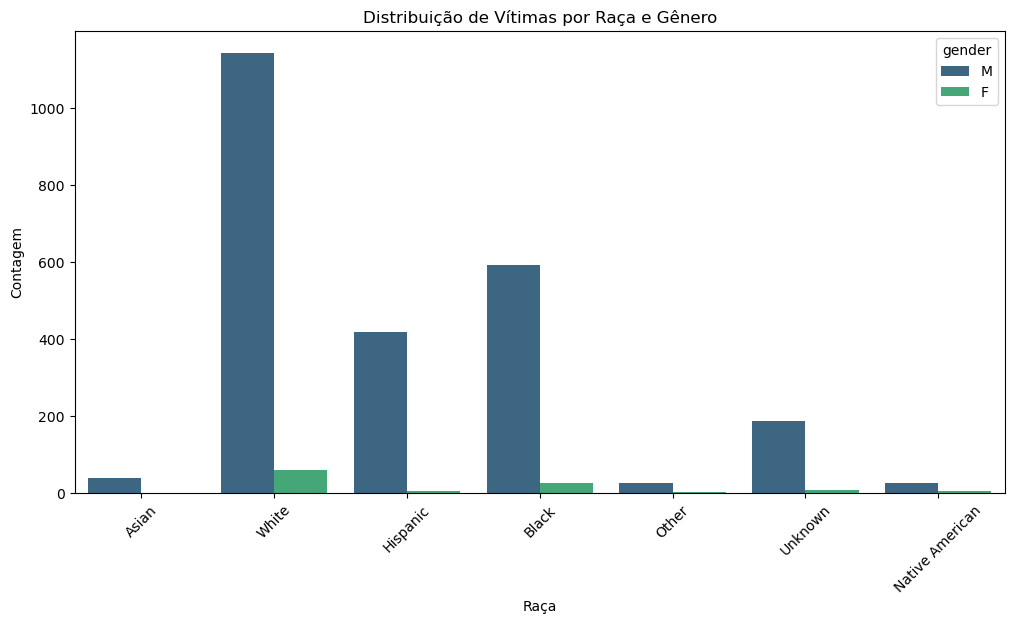

In [95]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='race', hue='gender', palette='viridis')
plt.title('Distribuição de Vítimas por Raça e Gênero')
plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

#### 3.2 - Porcentagem de Casos com Sinais de Doença Mental

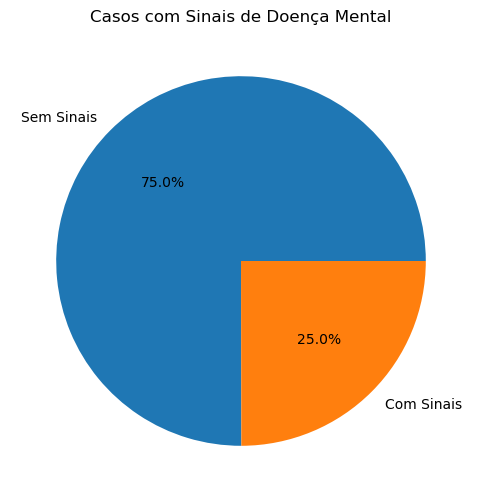

In [98]:
mental_illness = dataset['signs_of_mental_illness'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 6))
plt.pie(mental_illness, labels=['Sem Sinais', 'Com Sinais'], autopct='%1.1f%%')
plt.title('Casos com Sinais de Doença Mental')
plt.show()

#### 3.3 - Tipos de Arma Mais Comuns

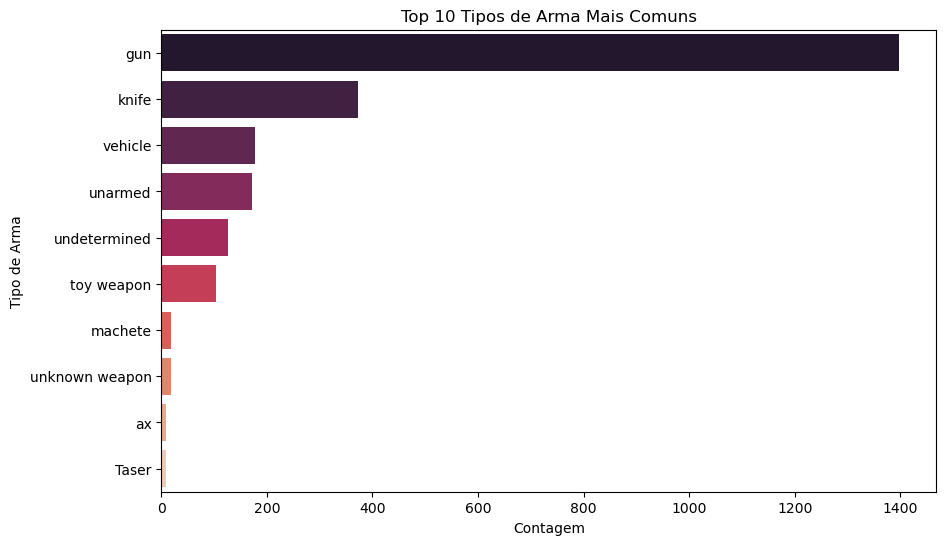

In [101]:
armas = dataset['armed'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=armas.values, y=armas.index, palette='rocket')
plt.title('Top 10 Tipos de Arma Mais Comuns')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Arma')
plt.show()

#### 3.4 - Padrões Geográficos (Estados)

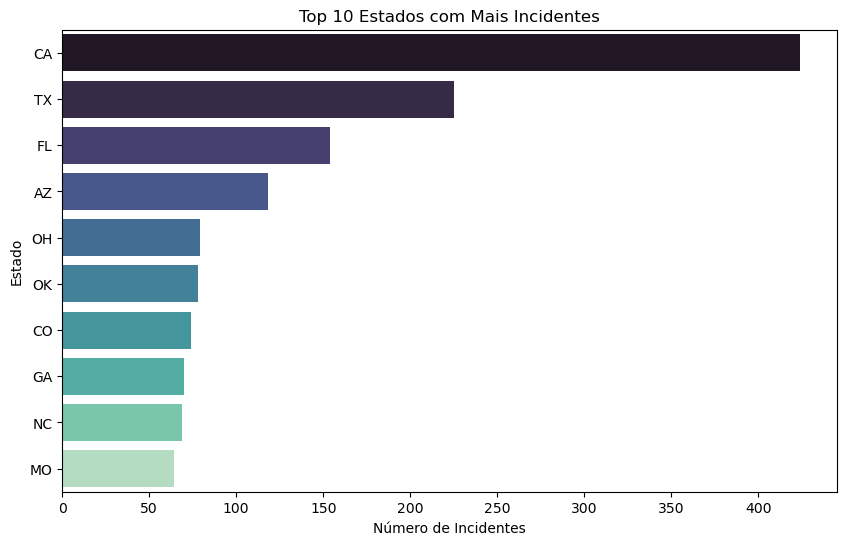

In [104]:
top_states = dataset['state'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='mako')
plt.title('Top 10 Estados com Mais Incidentes')
plt.xlabel('Número de Incidentes')
plt.ylabel('Estado')
plt.show()

#### 3.5 - Relação entre Nível de Ameaça e Desfecho

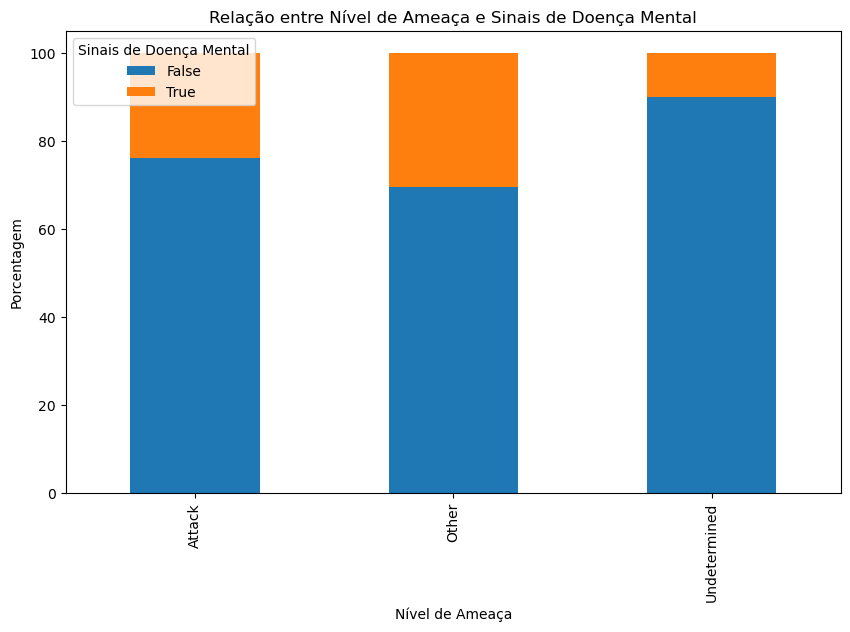

In [107]:
# Cruzar 'threat_level' com 'race' ou 'signs_of_mental_illness'
cross_tab = pd.crosstab(dataset['threat_level'], dataset['signs_of_mental_illness'], normalize='index') * 100
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relação entre Nível de Ameaça e Sinais de Doença Mental')
plt.xlabel('Nível de Ameaça')
plt.ylabel('Porcentagem')
plt.legend(title='Sinais de Doença Mental')
plt.show()

## Passo 4: Salvando o Dataset com codificação UTF-8

Por fim, depois de passar por todo o trabalho de colocar seu arquivo em UTF-8, você provavelmente desejará mantê-lo assim. 

A maneira mais fácil de fazer isso é salvar seus arquivos com codificação UTF-8. 

A boa notícia é que, como UTF-8 é a codificação padrão em Python, quando você salva um arquivo, ele é salvo como UTF-8 por padrão:

In [111]:
# Salvando o dataset no formato UTF-8 (padrão de gravação)
dataset.to_csv("PoliceKillingsUS-utf8.csv")
print("Dataset salvo com sucesso!")

Dataset salvo com sucesso!


E aí está!! Agora com os dados salvos no formato UTF-8 não precisamos mais realizar identificação e novas parametrizações para a abertura desse dataset.


# Fim Projeto 4